In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import sys
sys.path.append("../../models")
from pcpca import PCPCA

In [18]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [7]:
n, m = 400, 400

cov_X = [
    [1.0, 0.9],
    [0.9, 1.0]
]
cov_Y = [
    [1.0, 0.0],
    [0.0, 1.0]
]
X = multivariate_normal.rvs([0, 0], cov_X, size=n)
Y = multivariate_normal.rvs([0, 0], cov_Y, size=m)

X = X.T
Y = Y.T

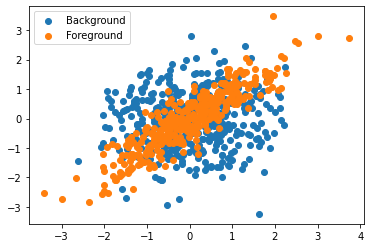

In [10]:
plt.scatter(Y[0, :], Y[1, :], label="Background")
plt.scatter(X[0, :], X[1, :], label="Foreground")
plt.legend()
plt.show()

0.10065475814245645


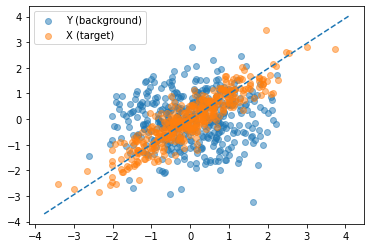

In [25]:
gamma = 0.00
pcpca = PCPCA(gamma=gamma * n/m, n_components=1)
X_reduced, Y_reduced = pcpca.fit_transform(X, Y)
print(pcpca.sigma2_mle)

plt.scatter(Y[0, :], Y[1, :], alpha=0.5, label="Y (background)")
plt.scatter(X[0, :], X[1, :], alpha=0.5, label="X (target)")
plt.legend()
# plt.xlim([-7, 7])
# plt.ylim([-7, 7])

origin = np.array([[0], [0]])  # origin point
abline(slope=pcpca.W_mle[1, 0] / pcpca.W_mle[0, 0], intercept=0)